In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
apple_df = pd.read_csv("aapl.csv")

In [5]:
apple_high_values = apple_df['High'].values

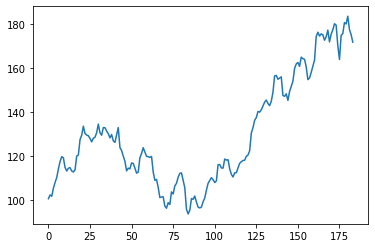

In [6]:
plt.plot(apple_high_values)

In [8]:
print(apple_high_values.max())
print(apple_high_values.min())

183.5
93.769997


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [22]:
apple_high = scaler.fit_transform(apple_high_values.reshape(-1,1))

In [25]:
print(apple_high.max())
print(apple_high.min())

1.0
0.0


In [26]:
apple_high

array([[0.0771203 ],
       [0.09595453],
       [0.08926782],
       [0.13061407],
       [0.15903269],
       [0.18421939],
       [0.22757165],
       [0.26524019],
       [0.2895353 ],
       [0.28396302],
       [0.23492701],
       [0.21698429],
       [0.2312493 ],
       [0.23403543],
       [0.21709576],
       [0.21208075],
       [0.22266803],
       [0.29232143],
       [0.29800517],
       [0.37568266],
       [0.3981946 ],
       [0.4438873 ],
       [0.40688734],
       [0.3989748 ],
       [0.39540847],
       [0.38192349],
       [0.3646495 ],
       [0.38281508],
       [0.38783026],
       [0.41078799],
       [0.45436303],
       [0.41011934],
       [0.39808321],
       [0.43686618],
       [0.43619754],
       [0.41925778],
       [0.40577282],
       [0.38493257],
       [0.401538  ],
       [0.36966459],
       [0.36175198],
       [0.39953189],
       [0.43686618],
       [0.33589665],
       [0.32096291],
       [0.29220996],
       [0.26613178],
       [0.217

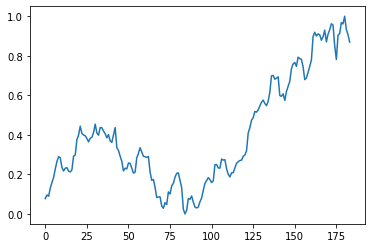

In [27]:
plt.plot(apple_high)

In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
my_gen = TimeseriesGenerator(apple_high, apple_high, length=5, batch_size=32)

In [30]:
X, y = my_gen[0]

In [31]:
X.shape

(32, 5, 1)

In [32]:
y.shape

(32, 1)

In [39]:
X[1], y[1]

(array([[0.09595453],
        [0.08926782],
        [0.13061407],
        [0.15903269],
        [0.18421939]]), array([0.22757165]))

In [35]:
from keras.layers import Input, LSTM, Dense
from keras.models import Model

In [41]:
inp_layer = Input(shape=(5,1))
lstm_1 = LSTM(32, return_sequences=True)(inp_layer)
lstm_2 = LSTM(64)(lstm_1)
d1 = Dense(10, activation='relu')(lstm_2)
out_layer = Dense(1, activation='linear')(d1)

In [42]:
model = Model(inp_layer, out_layer)

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5, 1)              0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 32)             4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 29,845
Trainable params: 29,845
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss="mse",  optimizer="adam")

In [46]:
model.fit_generator(my_gen, steps_per_epoch=10, epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
10/10 [==============================] - 2s 224ms/step - loss: 0.2163
Epoch 2/20
10/10 [==============================] - 0s 27ms/step - loss: 0.2243
Epoch 3/20
10/10 [==============================] - 0s 30ms/step - loss: 0.0360
Epoch 4/20
10/10 [==============================] - 0s 27ms/step - loss: 0.0338
Epoch 5/20
10/10 [==============================] - 0s 28ms/step - loss: 0.0199
Epoch 6/20
10/10 [==============================] - 0s 30ms/step - loss: 0.0157
Epoch 7/20
10/10 [==============================] - 0s 28ms/step - loss: 0.0114
Epoch 8/20
10/10 [==============================] - 0s 37ms/step - loss: 0.0105
Epoch 9/20
10/10 [==============================] - 0s 33ms/step - loss: 0.0068
Epoch 10/20
10/10 [==============================] - 0s 37ms/step - loss: 0.0059
Epoch 11/20
10/10 [==============================] - 0s 35ms/step - loss: 0.0053
Epoch 12/20
10/10 [==

In [47]:
y_pred = model.predict_generator(my_gen)

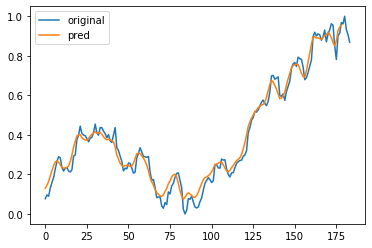

In [50]:
plt.plot(apple_high, label="original")
plt.plot(y_pred, label="pred")
plt.legend()

In [54]:
model.predict(apple_high[-5:].reshape(1,5,1))

array([[0.9403244]], dtype=float32)

In [60]:
# Future Stocks
scaler.inverse_transform(np.array(0.9403244).reshape(1,1))

array([[178.14530823]])